<a href="https://colab.research.google.com/github/keyaanminhas/Cell-Classification/blob/main/procom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [ ]:
import os


path = "/content/gdrive/MyDrive/PROCOM"
os.listdir(path)


os.mkdir(f"{path}/train_data")
os.mkdir(f"{path}/train_data/Normal")
os.mkdir(f"{path}/train_data/Abnormal")

FileExistsError: [Errno 17] File exists: '/content/gdrive/MyDrive/PROCOM/train_data'

In [ ]:
import pandas as pd
import shutil

df = pd.read_csv(f"{path}/Train.csv")
for ind in df.index:
    print(df['ID'][ind], df['Label'][ind])
    shutil.copyfile(f"{path}/train_images/{df['ID'][ind]}", f"{path}/train_data/{df['Label'][ind]}/{df['ID'][ind]}")

In [ ]:
import tensorflow as tf
path = "/content/gdrive/MyDrive/PROCOM"
DATA_DIR = path + '/'
data = tf.keras.utils.image_dataset_from_directory(DATA_DIR + "train_data", batch_size = 16, image_size=(512, 512))


train_size = int(len(data)*.8)
val_size = int(len(data)*.2)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)




Found 82 files belonging to 2 classes.


Epoch 1/30
4/4 [==============================] - ETA: 0s - loss: 6.0659 - accuracy: 0.6094
Epoch 1: val_loss improved from inf to 1.33524, saving model to xception_model_checkpoint.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 19s 2s/step - loss: 6.0659 - accuracy: 0.6094 - val_loss: 1.3352 - val_accuracy: 0.6875
Epoch 2/30
4/4 [==============================] - ETA: 0s - loss: 3.2262 - accuracy: 0.6406
Epoch 2: val_loss improved from 1.33524 to 0.70243, saving model to xception_model_checkpoint.h5
4/4 [==============================] - 10s 2s/step - loss: 3.2262 - accuracy: 0.6406 - val_loss: 0.7024 - val_accuracy: 0.6250
Epoch 3/30
4/4 [==============================] - ETA: 0s - loss: 5.3741 - accuracy: 0.5469
Epoch 3: val_loss did not improve from 0.70243
4/4 [==============================] - 9s 2s/step - loss: 5.3741 - accuracy: 0.5469 - val_loss: 2.4990 - val_accuracy: 0.5625
Epoch 4/30
4/4 [==============================] - ETA: 0s - loss: 3.7764 - accuracy: 0.6719
Epoch 4: val_loss did not improve from 0.70243
4/4 [==============================] - 8s 1s/step - loss: 3.7764 - accuracy: 0.6719 - val_loss: 1.0781 - val_accuracy: 0.6875
Epoch 5/30
4/4 [===========

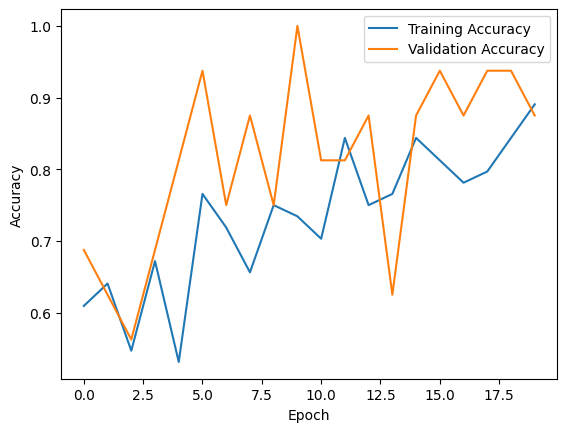

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import Xception
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

# Define paths to your training data
train_data_dir = 'path/to/training/data'
img_size = (512, 512)  # Adjust according to your image size

# Load the Xception base model (pre-trained on ImageNet) with explicit input_shape
base_model = Xception(input_shape=(img_size[0], img_size[1], 3), include_top=False, weights='imagenet')

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Data augmentation to increase training set size
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)


# Create a custom model by adding new layers on top of the pre-trained base
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification (Normal or Abnormal)

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define model checkpoints and early stopping
checkpoint_path = 'xception_model_checkpoint.h5'
model_checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

# Train the model
history = model.fit(
    train,
    epochs=30,
    validation_data=val,
    callbacks=[model_checkpoint, early_stopping]
)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt

# Define paths to your training data
img_size = (512, 512)  # Adjust according to your image size

# Load the MobileNetV2 base model (pre-trained on ImageNet)
base_model = MobileNetV2(input_shape=(img_size[0], img_size[1], 3), include_top=False, weights='imagenet')


# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Data augmentation to increase training set size
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)


# Create a custom model by adding new layers on top of the pre-trained base
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(img_size[0], img_size[1], 3)))
# model.add(train_datagen)
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification (Normal or Abnormal)

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define model checkpoints and early stopping
checkpoint_path = 'model_checkpoint.h5'
model_checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min', verbose=1)
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)

# Train the model
history = model.fit(
    train,
    epochs=40,
    validation_data=val,
    callbacks=[model_checkpoint]
)



# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/40
4/4 [==============================] - ETA: 0s - loss: 0.7502 - accuracy: 0.5312
Epoch 1: val_loss improved from inf to 0.71450, saving model to model_checkpoint.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 13s 2s/step - loss: 0.7502 - accuracy: 0.5312 - val_loss: 0.7145 - val_accuracy: 0.3125
Epoch 2/40
4/4 [==============================] - ETA: 0s - loss: 0.6333 - accuracy: 0.6250
Epoch 2: val_loss improved from 0.71450 to 0.47618, saving model to model_checkpoint.h5
4/4 [==============================] - 8s 2s/step - loss: 0.6333 - accuracy: 0.6250 - val_loss: 0.4762 - val_accuracy: 0.8125
Epoch 3/40
4/4 [==============================] - ETA: 0s - loss: 0.6611 - accuracy: 0.5781
Epoch 3: val_loss did not improve from 0.47618
4/4 [==============================] - 9s 2s/step - loss: 0.6611 - accuracy: 0.5781 - val_loss: 0.5370 - val_accuracy: 0.6250
Epoch 4/40
4/4 [==============================] - ETA: 0s - loss: 0.6184 - accuracy: 0.6406
Epoch 4: val_loss improved from 0.47618 to 0.43205, saving model to model_checkpoint.h5
4/4 [==============================] - 7s 1s/step - loss: 0.6184 - accuracy: 0.6406 - val_loss: 0.4321 - val_accuracy: 0.7

KeyboardInterrupt: 

Epoch 1/40
4/4 [==============================] - ETA: 0s - loss: 0.9396 - accuracy: 0.4219
Epoch 1: val_loss improved from inf to 1.12241, saving model to blackboxbest.h5
4/4 [==============================] - 14s 3s/step - loss: 0.9396 - accuracy: 0.4219 - val_loss: 1.1224 - val_accuracy: 0.3125
Epoch 2/40
4/4 [==============================] - ETA: 0s - loss: 0.7891 - accuracy: 0.5000
Epoch 2: val_loss improved from 1.12241 to 0.57435, saving model to blackboxbest.h5
4/4 [==============================] - 13s 3s/step - loss: 0.7891 - accuracy: 0.5000 - val_loss: 0.5743 - val_accuracy: 0.7500
Epoch 3/40
4/4 [==============================] - ETA: 0s - loss: 0.7051 - accuracy: 0.5938
Epoch 3: val_loss did not improve from 0.57435
4/4 [==============================] - 13s 3s/step - loss: 0.7051 - accuracy: 0.5938 - val_loss: 0.8779 - val_accuracy: 0.4375
Epoch 4/40
4/4 [==============================] - ETA: 0s - loss: 0.6787 - accuracy: 0.5625
Epoch 4: val_loss did not improve from 0

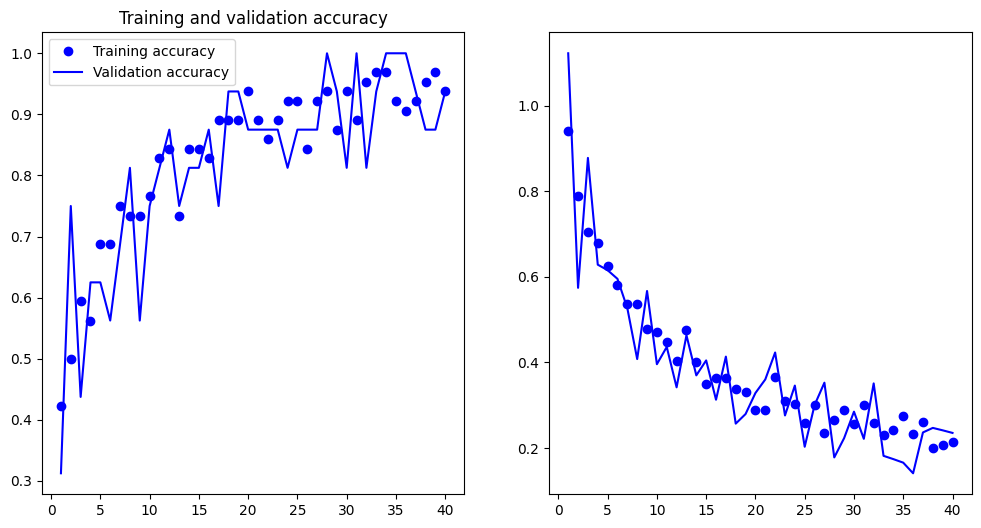

In [ ]:
import tensorflow as tf
import numpy as np
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, RandomRotation, RandomFlip, RandomZoom, RandomContrast, RandomBrightness
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint


# Define the data augmentation layers
data_augmentation = tf.keras.Sequential([
  RandomRotation(0.2),
  RandomFlip("horizontal_and_vertical"),
  RandomZoom(0.05),
  RandomContrast(0.1),
  RandomBrightness(0.1),
])

# Load and preprocess the images

# Apply data augmentation to the training dataset
train_dataset = train.map(lambda x, y: (data_augmentation(x, training=True), y))

# Load the VGG16 base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(512, 512, 3))

# Add a global spatial average pooling model
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer
x = Dense(1024, activation='relu')(x)
x = Dense(128, activation='relu')(x)

# Add a binary classification layer
predictions = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Define the callback function to save the best model during training
checkpoint_callback = ModelCheckpoint(
    filepath='blackboxbest.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    mode='min',
    save_freq='epoch',
    verbose=1)

# Train the model
history = model.fit(
    train_dataset,
    epochs=40,
    validation_data=val,
    callbacks=[checkpoint_callback])

# Plot the validation loss and accuracy
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')


In [ ]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import os
import numpy as np
# Load the fine-tuned VGG16 model
# Preprocess the test image
print(DATA_DIR)
img_dir = f'{DATA_DIR}/test_images'

load_model = "/content/blackboxbest.h5"
results = []


for current in os.listdir(img_dir):
    path = img_dir + "/" + current
    img = image.load_img(path, target_size=(512, 512))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Make a prediction on the test image
    prediction = model.predict(x)

    # Print the prediction
    if prediction[[0]] > 0.50:
        print("Normal")
        results.append([current, "Normal"])
    else:
        print("Abnormal")
        results.append([current, "Abnormal"])

df = pd.DataFrame(results, columns=['ID', 'Label'])
df.head(82)


/content/gdrive/MyDrive/PROCOM/
1/1 [==============================] - 0s 24ms/step
Normal
1/1 [==============================] - 0s 33ms/step
Abnormal
1/1 [==============================] - 0s 24ms/step
Abnormal
1/1 [==============================] - 0s 64ms/step
Abnormal
1/1 [==============================] - 0s 25ms/step
Abnormal
1/1 [==============================] - 0s 31ms/step
Abnormal
1/1 [==============================] - 0s 24ms/step
Abnormal
1/1 [==============================] - 0s 24ms/step
Abnormal
1/1 [==============================] - 0s 23ms/step
Abnormal
1/1 [==============================] - 0s 24ms/step
Normal
1/1 [==============================] - 0s 27ms/step
Normal
1/1 [==============================] - 0s 30ms/step
Normal
1/1 [==============================] - 0s 28ms/step
Abnormal
1/1 [==============================] - 0s 24ms/step
Normal
1/1 [==============================] - 0s 26ms/step
Abnormal
1/1 [==============================] - 0s 26ms/step
Abnormal
1/

,ID,Label
0,0c6a5.jpg,Normal
1,1b6ee.jpg,Abnormal
2,2f950.jpg,Abnormal
3,10261.jpg,Abnormal
4,1bba1.jpg,Abnormal
...,...,...
77,da358.jpg,Abnormal
78,f550d.jpg,Abnormal
79,dcea6.jpg,Abnormal
80,e8e57.jpg,Abnormal


In [ ]:
df.to_csv("keyaan_minhas_submission4.csv", index=False)
print(df.query("Label == 'Normal'").value_counts().sum())

15
